In [4]:
!pip install ppscore --upgrade

#      **Import Necessary Libraries**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
import ppscore as pps

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


## **Load Dataset**

In [6]:
data = pd.read_excel("Churn (1).xlsx")
data.head()

## **Loading and Exploring the Dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [9]:
data.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,1443.520003,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,2500.500000,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3750.250000,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


The dataset consists of 5,000 customer records with various call usage metrics. The average account length is around 100 days, with a standard deviation of 40 days. Most customers do not use voicemail services, as the median voicemail message count is 0. The average daytime call duration is approximately 180 minutes, while international calls average 10 minutes. Customer service calls range from 0 to 9, indicating varying levels of engagement or service issues.

In [10]:
#checking for missing values
data.isnull().sum()

,0
Unnamed: 0,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0


**Data Preprocessing**

In [11]:
# Convert incorrectly stored numerical columns
cols_to_convert = ['day.charge', 'eve.mins', 'eve.calls']
data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [12]:
# Drop redundant columns
data.drop(['Unnamed: 0', 'area.code'], axis=1, inplace=True)


In [13]:
# Fill missing values with median
data.fillna(data.median(), inplace=True)


<ipython-input-13-2105a02d1dee>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


**Exploratory Data Analysis (EDA)**

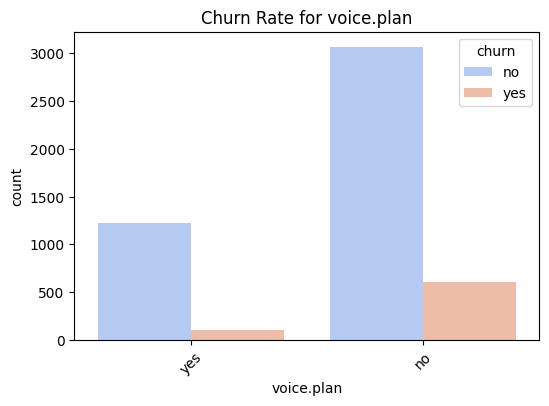

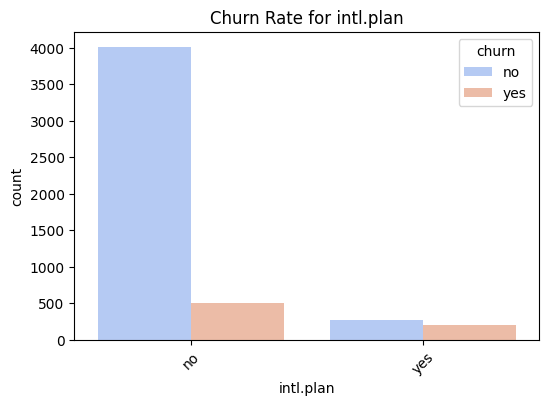

In [14]:
for col in ['voice.plan', 'intl.plan']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='churn', palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(f"Churn Rate for {col}")
    plt.show()

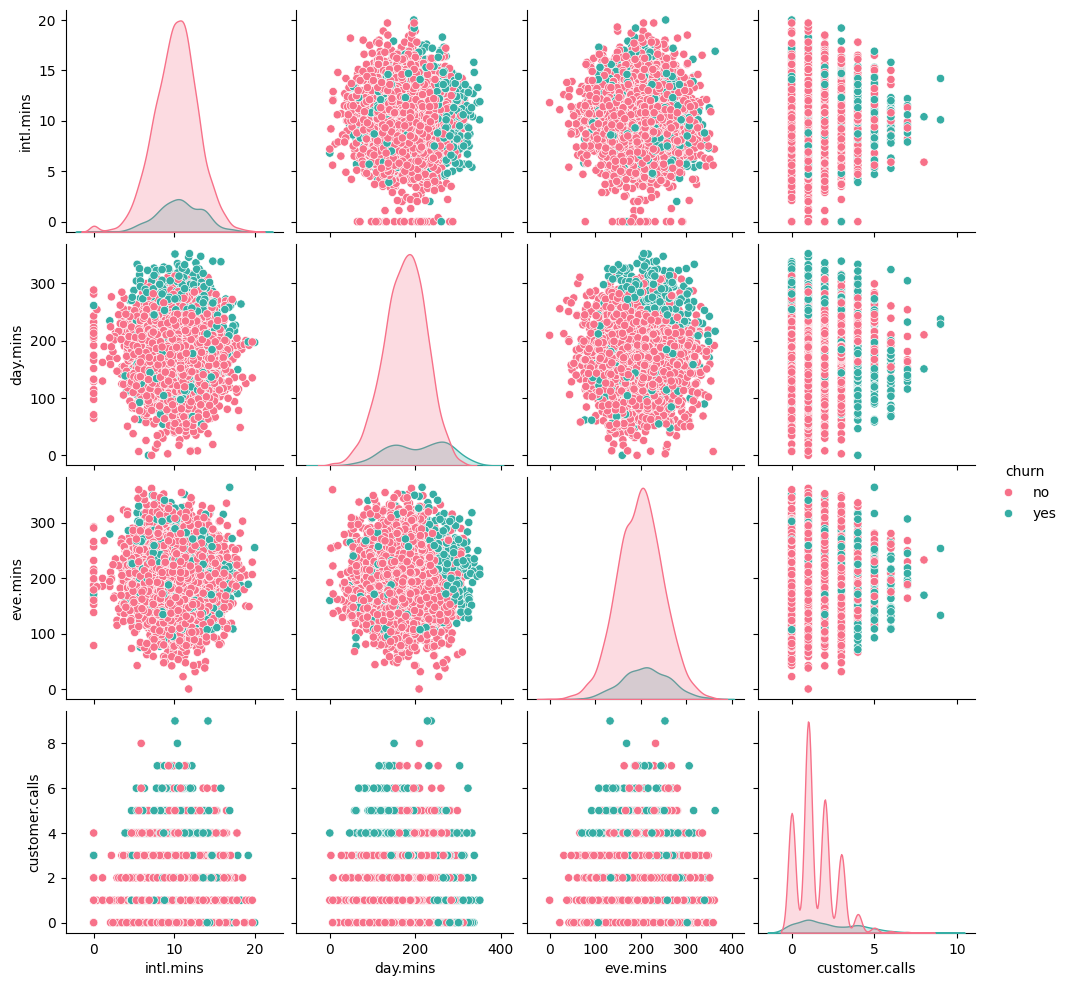

In [15]:
important_features = ['intl.mins', 'day.mins', 'eve.mins', 'customer.calls', 'churn']
sns.pairplot(data[important_features], hue='churn', palette="husl")
plt.show()

The pairplot shows the relationship between various call-related features and customer churn. Customers making more service calls are more likely to churn. Intl. minutes have a slight impact on churn, while day and evening minutes show no strong correlation. The density plots highlight differences in churn behavior. This helps in understanding key factors influencing customer retention.

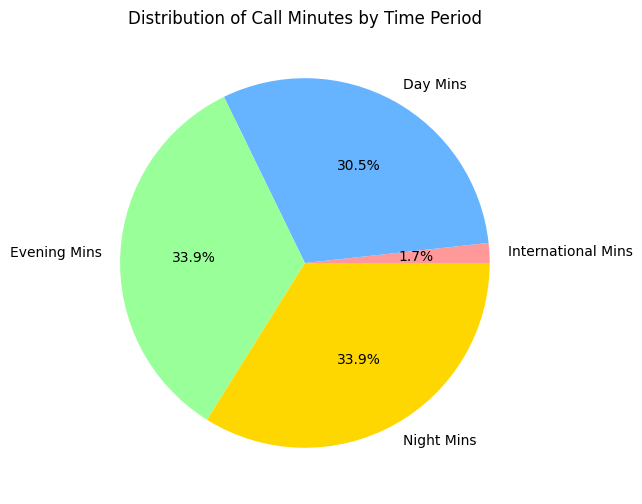

In [16]:
# Calculate total usage per category
usage_data = {
    "International Mins": data['intl.mins'].sum(),
    "Day Mins": data['day.mins'].sum(),
    "Evening Mins": data['eve.mins'].sum(),
    "Night Mins": data['night.mins'].sum()
}

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(usage_data.values(), labels=usage_data.keys(), autopct='%1.1f%%', colors=["#FF9999", "#66B3FF", "#99FF99", "#FFD700"])
plt.title("Distribution of Call Minutes by Time Period")
plt.show()

The pie chart represents the distribution of call minutes across different time periods. Evening and night calls contribute equally at 33.9% each. Daytime calls account for 30.5%, while international calls are minimal at 1.7%. This highlights that most call activity occurs during evening and night hours.

**Feature Encoding and Correlation Analysis**

In [17]:
# Assuming 'data' is your DataFrame

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Verify the transformation
print(data.head())


   state  account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0     16             128           1              25          0       10.0   
1     35             107           1              26          0       13.7   
2     31             137           0               0          0       12.2   
3     35              84           0               0          1        6.6   
4     36              75           0               0          1       10.1   

   intl.calls  intl.charge  day.mins  day.calls  day.charge  eve.mins  \
0           3         2.70     265.1        110       45.07     197.4   
1           3         3.70     161.6        123       27.47     195.5   
2           5         3.29     243.4        114       41.38     121.2   
3           7         1.78     299.4         71       50.90      61.9   
4           3         2.73     166.7        113       28.34     148.3   

   eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0         99       16.78 

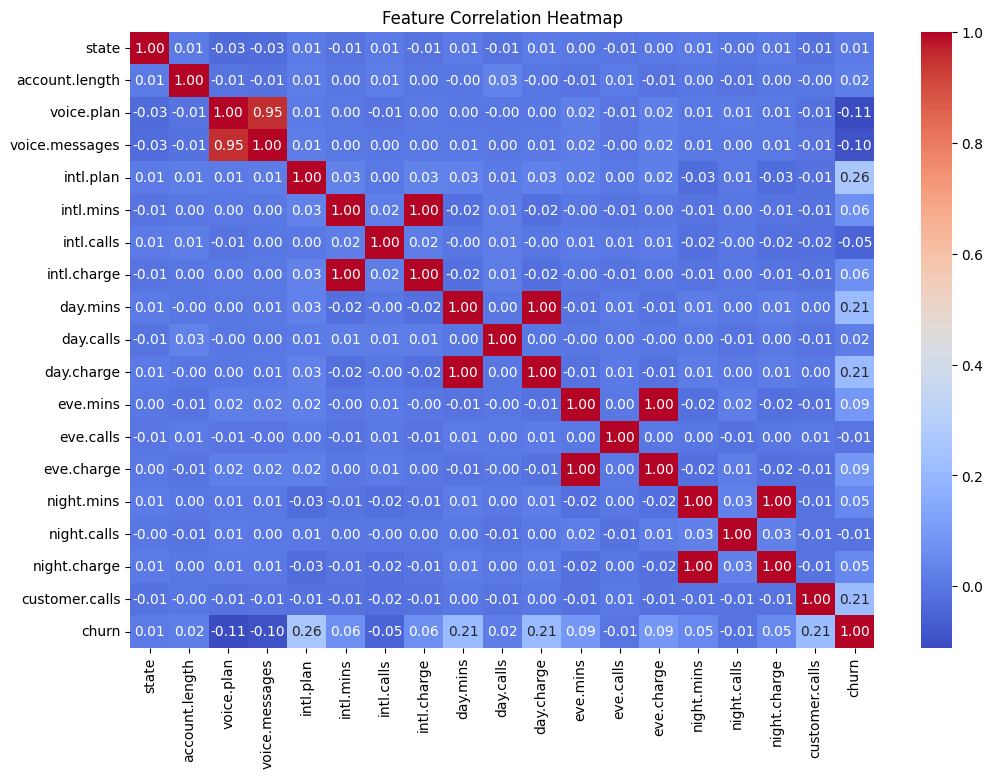

In [18]:
# 1. Check for correlations among features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

The heatmap illustrates feature correlations within the dataset. Dark red cells indicate strong positive correlations, such as between "voice.plan" and "voice.messages" (0.95) and between "intl.mins" and "intl.charge" (1.00). The "churn" variable shows a moderate correlation with "intl.plan" (0.26) and "customer.calls" (0.21), suggesting these features may influence customer churn.

**Handling Class Imbalance**


Churn vs Non-Churn Mean Values:
            state  account.length  voice.plan  voice.messages  intl.plan  \
churn                                                                     
0      25.956674       99.917074    0.284416        8.291870   0.063825   
1      26.251768      102.332390    0.144272        4.496464   0.281471   

       intl.mins  intl.calls  intl.charge    day.mins   day.calls  day.charge  \
churn                                                                           
0      10.190869    4.481947     2.752055  175.746564   99.899604   29.881903   
1      10.692362    4.151344     2.887426  207.870580  100.817539   35.338416   

         eve.mins   eve.calls  eve.charge  night.mins  night.calls  \
churn                                                                
0      198.757442  100.241556   16.898654  199.455113    99.975775   
1      211.663366   99.884017   17.999562  206.078218    99.575672   

       night.charge  customer.calls  
churn                

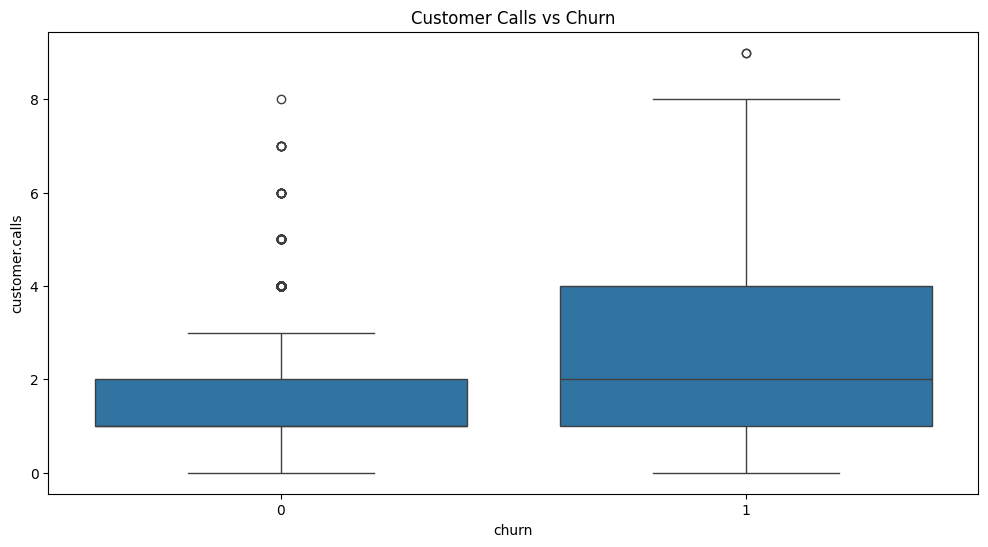

In [19]:
churn_summary = data.groupby('churn').mean()
print("\nChurn vs Non-Churn Mean Values:\n", churn_summary)

# Visualizing differences in key features
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['churn'], y=data['customer.calls'])
plt.title("Customer Calls vs Churn")
plt.show()



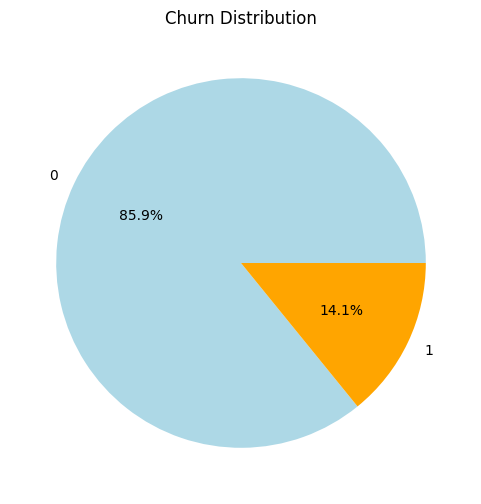

In [20]:
plt.figure(figsize=(6, 6))
data['churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

In [21]:
# Check imbalance ratio
if min(data['churn'].value_counts()) / max(data['churn'].value_counts()) < 0.5:
    print("Data is imbalanced. Consider handling this with SMOTE or undersampling.")
else:
    print("Data is balanced.")


Data is imbalanced. Consider handling this with SMOTE or undersampling.


In [22]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Check if the class imbalance ratio is significant (less than 0.5)
if min(data['churn'].value_counts()) / max(data['churn'].value_counts()) < 0.5:
    smote = SMOTE(random_state=42)

    # Resample the data
    X_resampled, y_resampled = smote.fit_resample(data.drop(columns=['churn']), data['churn'])

    # Create a new DataFrame with resampled data
    df = pd.DataFrame(X_resampled, columns=data.drop(columns=['churn']).columns)
    df['churn'] = y_resampled
else:
    df = data.copy()

# Verify the resampled data
print(df['churn'].value_counts())



0    4293
1    4293
Name: churn, dtype: int64


**Feature Importance Analysis**

In [23]:
X = df.drop(columns=['churn'])
y = df['churn']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

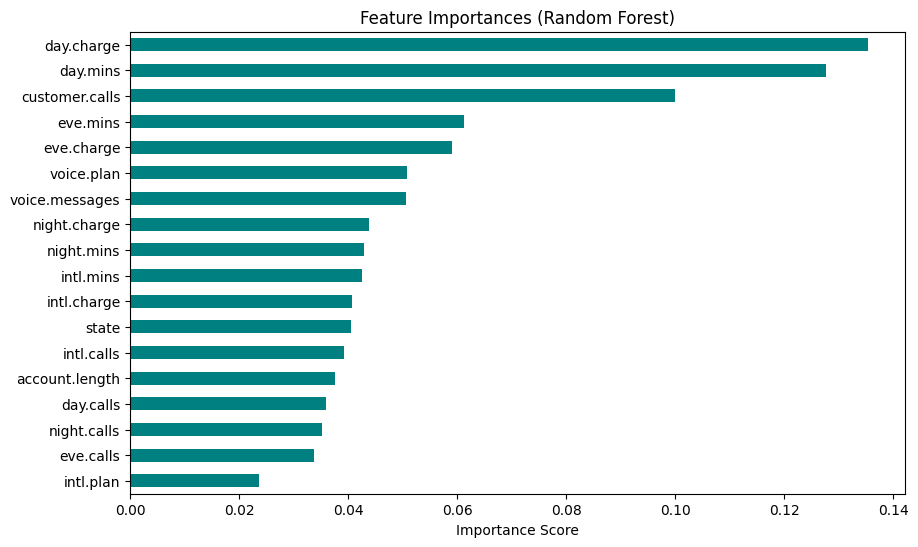

In [24]:
# Random Forest Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


This bar chart represents feature importance scores from a Random Forest model. The most influential features for predictions are day.charge, day.mins, and customer.calls, indicating that daytime call usage and customer service interactions significantly impact the model's predictions. Features like intl.plan and eve.calls have lower importance scores, suggesting they contribute less to the outcome.

In [25]:
# Predictive Power Score (PPS) Matrix
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']]
pps_matrix = pps_matrix[pps_matrix['y'] == 'churn'].sort_values(by='ppscore', ascending=False)
print("\nTop 10 Features by PPS Score:\n", pps_matrix)



Top 10 Features by PPS Score:
                   x      y   ppscore
360           churn  churn  1.000000
113       intl.mins  churn  0.641859
151     intl.charge  churn  0.633737
322    night.charge  churn  0.333518
208      day.charge  churn  0.263840
170        day.mins  churn  0.233716
265      eve.charge  churn  0.218374
227        eve.mins  churn  0.177820
284      night.mins  churn  0.122550
56       voice.plan  churn  0.054167
341  customer.calls  churn  0.040802
75   voice.messages  churn  0.036256
18            state  churn  0.014892
132      intl.calls  churn  0.005465
246       eve.calls  churn  0.000000
37   account.length  churn  0.000000
303     night.calls  churn  0.000000
94        intl.plan  churn  0.000000
189       day.calls  churn  0.000000


<ipython-input-26-b44596f1e465>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ppscore', y='x', data=top_10_pps, palette='Blues_d')


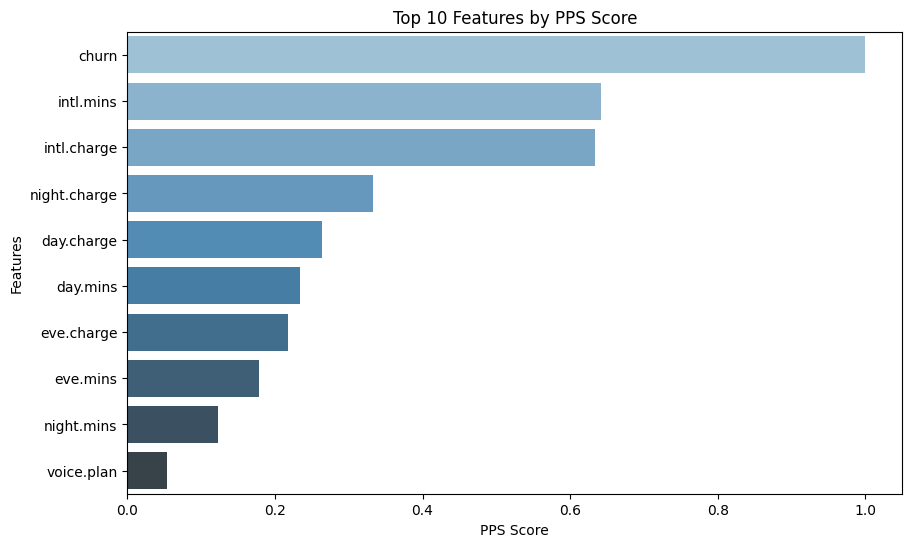

In [26]:


# Print the top 10 features by PPS score
top_10_pps = pps_matrix.head(10)

# Visualize the top 10 features by PPS score
plt.figure(figsize=(10, 6))
sns.barplot(x='ppscore', y='x', data=top_10_pps, palette='Blues_d')
plt.title('Top 10 Features by PPS Score')
plt.xlabel('PPS Score')
plt.ylabel('Features')
plt.show()


This bar chart shows the Top 10 Features by Predictive Power Score (PPS). The churn feature has the highest PPS score, indicating its strong predictive power. Other important features include intl.mins, intl.charge, and night.charge, which suggest that international and nighttime call-related factors play a significant role in predictions. The voice.plan feature has the lowest PPS score among the top 10, indicating a weaker relationship compared to other features.

In [27]:
# Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
print("\nTop 5 Features by RFE:\n", X.columns[rfe.support_])


Top 5 Features by RFE:
 Index(['day.mins', 'day.charge', 'eve.mins', 'eve.charge', 'night.mins'], dtype='object')


<ipython-input-28-3b022c29a759>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rank', y='Feature', data=rfe_importance, palette='viridis')


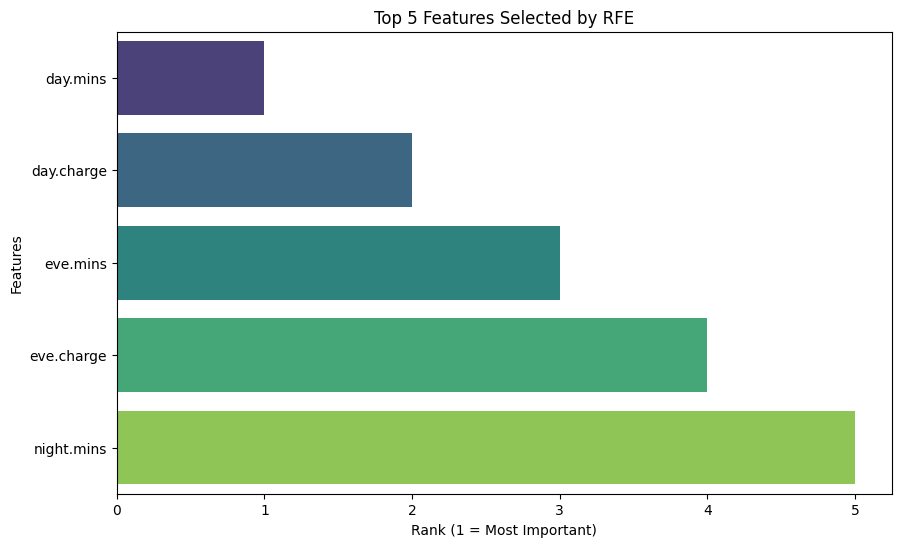

In [28]:
# Top 5 features selected by RFE
top_5_rfe_features = X.columns[rfe.support_]

# Create a DataFrame for the top 5 RFE features and their rankings
rfe_importance = pd.DataFrame({
    'Feature': top_5_rfe_features,
    'Rank': range(1, len(top_5_rfe_features) + 1)
})

# Visualize the top 5 features by RFE
plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Feature', data=rfe_importance, palette='viridis')
plt.title('Top 5 Features Selected by RFE')
plt.xlabel('Rank (1 = Most Important)')
plt.ylabel('Features')
plt.show()


This bar chart displays the Top 5 Features Selected by Recursive Feature Elimination (RFE). The most important feature is day.mins, ranked as the top feature. Other significant features include day.charge, eve.mins, eve.charge, and night.mins. These features likely have the highest impact on the target variable based on the RFE selection process.

**Feature Scaling and Outlier Detection**

In [29]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features (exclude the target variable 'churn')
X_scaled = scaler.fit_transform(df.drop(columns=['churn']))  # Use df instead of df_resampled

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=df.drop(columns=['churn']).columns)

# Add the target variable back to the scaled DataFrame
df_scaled['churn'] = df['churn']  # Use df instead of df_resampled

# Verify the scaled data
df_scaled

,state,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,-0.728583,0.708425,2.149211,1.560277,-0.309374,-0.173489,-0.501395,-0.174223,1.199318,0.508455,1.199519,-0.163929,-0.049118,-0.164810,0.868418,-0.443129,0.867671,-0.503745,0
1,0.651113,0.158957,2.149211,1.642957,-0.309374,1.266981,-0.501395,1.267839,-0.498846,1.197652,-0.499372,-0.201823,0.165448,-0.202298,1.066458,0.196085,1.067295,-0.503745,0
2,0.360651,0.943912,-0.465287,-0.506733,-0.309374,0.683006,0.355402,0.676593,0.843277,0.720515,0.843331,-1.683649,0.540940,-1.683091,-0.807775,0.249352,-0.806450,-1.214419,0
3,0.651113,-0.442842,-0.465287,-0.506733,3.232337,-1.497164,1.212200,-1.500921,1.762091,-1.559139,1.762277,-2.866317,-0.639177,-2.863976,-0.107490,-0.549665,-0.107766,0.206928,0
4,0.723729,-0.678329,-0.465287,-0.506733,3.232337,-0.134558,-0.501395,-0.130961,-0.415169,0.667500,-0.415392,-1.143171,1.184641,-1.141852,-0.311654,1.154905,-0.311927,0.917601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8581,1.449885,-0.076530,-0.465287,-0.506733,-0.309374,0.896179,0.355402,0.893045,1.116686,-0.074713,1.116225,1.046649,-0.585536,1.044041,1.095229,-0.602932,1.094215,-1.214419,1
8582,0.723729,-0.416677,-0.465287,-0.506733,-0.309374,0.470063,-0.501395,0.472748,0.366512,0.720515,0.366106,2.097147,-1.068311,2.093119,-0.071579,-1.508485,-0.070813,-1.214419,1
8583,-0.438121,0.315948,-0.465287,-0.506733,-0.309374,0.818122,0.355402,0.817831,0.545773,-0.021698,0.545685,1.431107,-1.980220,1.428311,0.340352,-0.656200,0.339120,0.206928,1
8584,-1.527355,0.289782,-0.465287,0.568112,-0.309374,0.724783,-0.929794,0.725502,-0.369845,-0.392804,-0.370062,-2.046517,1.023716,-2.045538,0.617652,0.249352,0.617311,0.917601,1


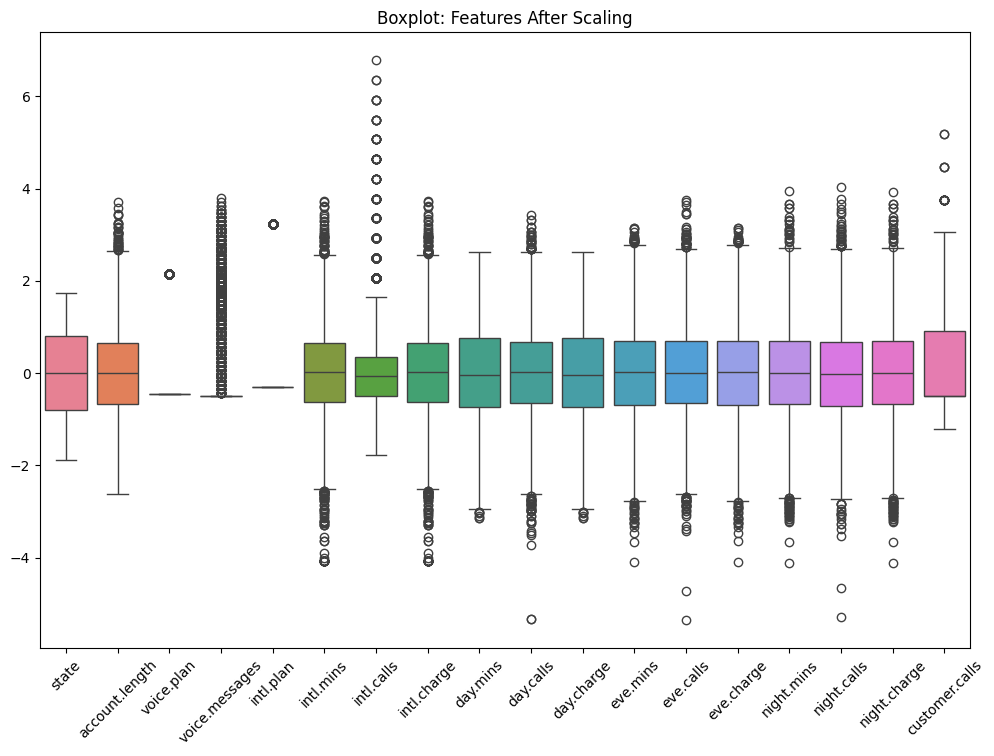

In [30]:

# Assuming df_scaled contains the scaled features with the target variable 'churn'

# 1. **Boxplot** for feature visualization
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scaled.drop(columns=['churn']))
plt.title('Boxplot: Features After Scaling')
plt.xticks(rotation=45)
plt.show()




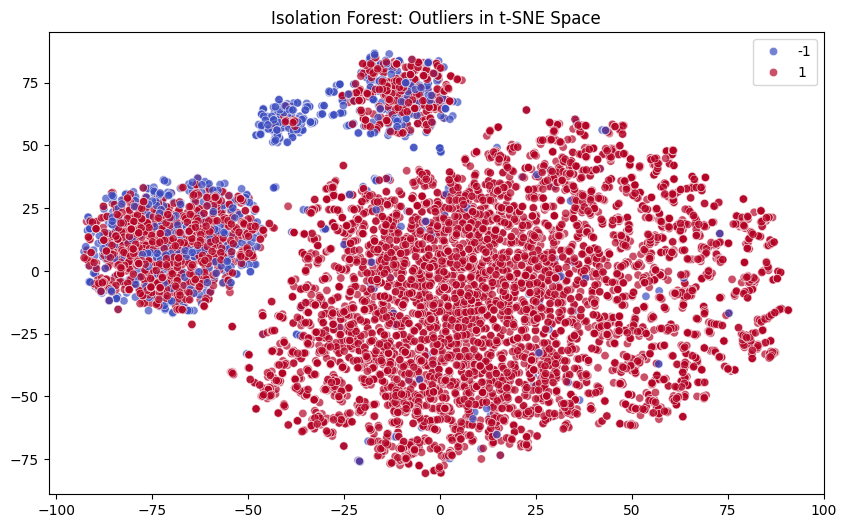

In [31]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2. **Isolation Forest** for outlier detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers_iso = iso_forest.fit_predict(df_scaled.drop(columns=['churn']))

# Visualize outliers from Isolation Forest in t-SNE space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=outliers_iso, palette='coolwarm', alpha=0.7)
plt.title('Isolation Forest: Outliers in t-SNE Space')
plt.show()

This scatter plot visualizes outliers detected using the Isolation Forest algorithm in a t-SNE reduced feature space.

Red points (1) represent inliers (normal observations).
Blue points (-1) indicate detected outliers (anomalies).

The clustering patterns suggest that some groups of data points have a higher concentration of anomalies, possibly indicating distinct data distributions or errors in the dataset.

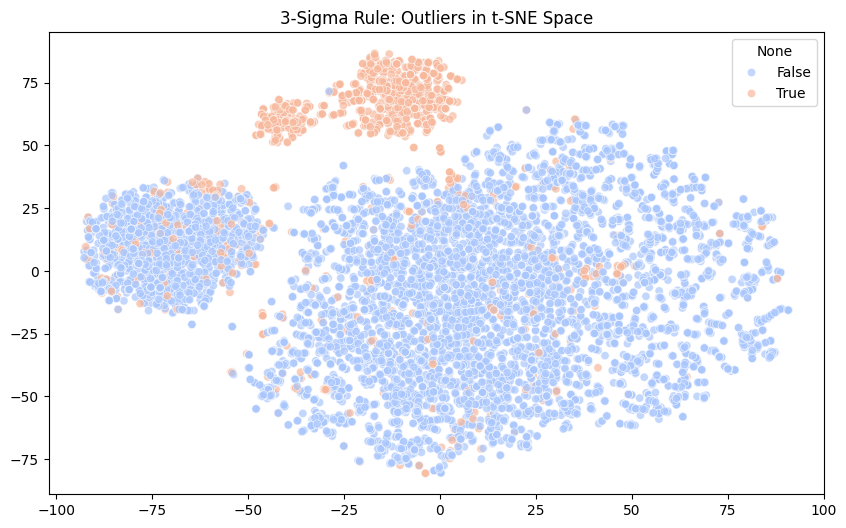

In [32]:
# 3. **3-Sigma Rule** for outlier detection
z_scores = np.abs(zscore(df_scaled.drop(columns=['churn'])))
outliers_3sigma = (z_scores > 3)

# Visualize 3-sigma rule outliers in t-SNE space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=np.any(outliers_3sigma, axis=1), palette='coolwarm', alpha=0.7)
plt.title('3-Sigma Rule: Outliers in t-SNE Space')
plt.show()

This scatter plot visualizes outliers detected using the 3-Sigma Rule in a t-SNE reduced feature space.

Blue points (False) represent normal observations.
Orange points (True) indicate detected outliers.
The 3-Sigma Rule identifies outliers as data points that lie beyond three standard deviations from the mean. Clusters of orange points suggest regions with unusual data distributions, possibly indicating anomalies or deviations from the norm.

                    
#                    **Model Training and Evaluation**

In [33]:
# Train-test split before removing outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Model Building Before removing ouliers**

In [34]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate models before removing outliers
model_results_before_outliers = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Store results
    model_results_before_outliers[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep
    }

# Display results before outliers
for model_name, result in model_results_before_outliers.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 60)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6781832298136646
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1299
           1       0.67      0.69      0.68      1277

    accuracy                           0.68      2576
   macro avg       0.68      0.68      0.68      2576
weighted avg       0.68      0.68      0.68      2576

------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.8524844720496895
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1299
           1       0.83      0.88      0.86      1277

    accuracy                           0.85      2576
   macro avg       0.85      0.85      0.85      2576
weighted avg       0.85      0.85      0.85      2576

------------------------------------------------------------
Model: Random Forest
Accuracy: 0.9429347826086957
Classification Report:

The model performance metrics presented above are before removing outliers.

**Outliers Removal(IQR)**

Original Data Shape: (8586, 19)
New Data Shape (After Removing Outliers with IQR): (5417, 19)


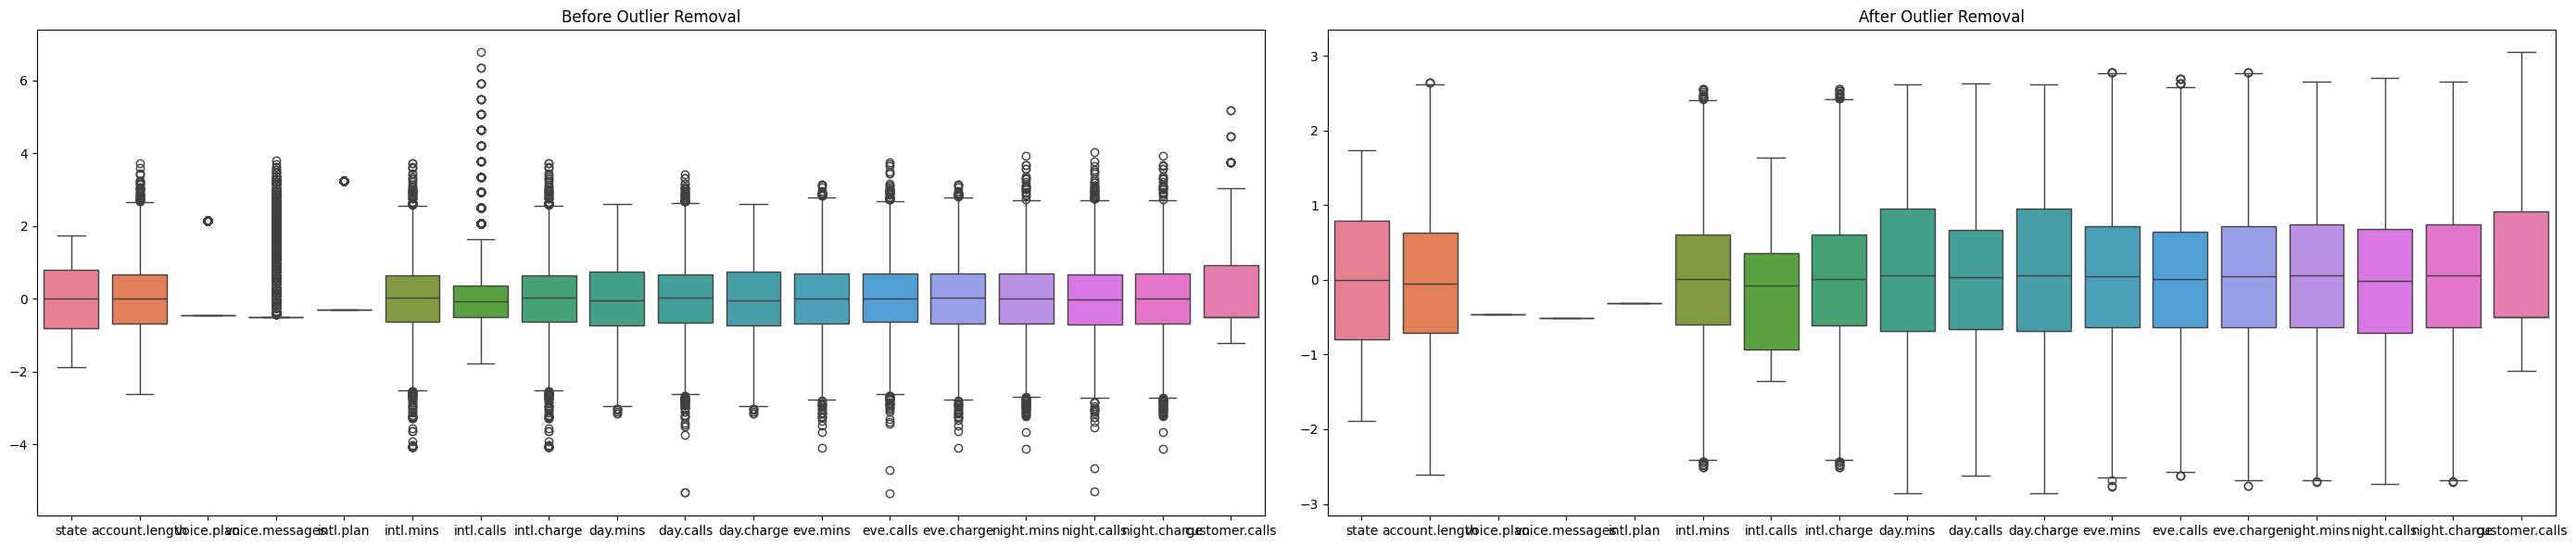

In [35]:


# Assuming df_scaled is your DataFrame with features and the target column 'churn'

# Calculate the IQR (Interquartile Range) for each feature
Q1 = df_scaled.drop(columns=['churn']).quantile(0.25)  # 25th percentile (Q1)
Q3 = df_scaled.drop(columns=['churn']).quantile(0.75)  # 75th percentile (Q3)

# Calculate the IQR for each feature
IQR = Q3 - Q1

# Define outlier thresholds (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any feature value is an outlier (outside of lower and upper bounds)
df_scaled_no_outliers = df_scaled[~((df_scaled.drop(columns=['churn']) < lower_bound) | (df_scaled.drop(columns=['churn']) > upper_bound)).any(axis=1)]

# Output the new shape of the dataset after outlier removal
print(f"Original Data Shape: {df_scaled.shape}")
print(f"New Data Shape (After Removing Outliers with IQR): {df_scaled_no_outliers.shape}")

# Box plot visualization of the features before and after removing outliers
plt.figure(figsize=(28, 6))

# Boxplot before outlier removal
plt.subplot(1, 2, 1)
sns.boxplot(data=df_scaled.drop(columns=['churn']))
plt.title('Before Outlier Removal')

# Boxplot after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_scaled_no_outliers.drop(columns=['churn']))
plt.title('After Outlier Removal')

plt.tight_layout()
plt.show()


**Model Building After removing Outliers**

In [36]:


# Assuming df_scaled_no_outliers is your final cleaned data
# Define feature columns and target variable (assuming 'churn' is the target)
X = df_scaled_no_outliers.drop(columns=['churn'])
y = df_scaled_no_outliers['churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test data
print(f"Training Data Shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing Data Shape: X_test {X_test.shape}, y_test {y_test.shape}")


Training Data Shape: X_train (4333, 18), y_train (4333,)
Testing Data Shape: X_test (1084, 18), y_test (1084,)


In [37]:

# Define the models for comparison
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize dictionary to store models' results
model_results = {}

# Train each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict the target values for the test set
    y_pred = model.predict(X_test)

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Model': model
    }

# Output the evaluation results
print("Model Evaluation Results (Based on Accuracy):\n")
best_accuracy = 0
best_model_accuracy = None

for model_name, result in model_results.items():
    print(f"{model_name} - Accuracy: {result['Accuracy']:.4f}")

    # Identify the best model based on Accuracy
    if result['Accuracy'] > best_accuracy:
        best_accuracy = result['Accuracy']
        best_model_accuracy = model_name

print(f"\nBest Model based on Accuracy: {best_model_accuracy}")

Model Evaluation Results (Based on Accuracy):

Logistic Regression - Accuracy: 0.7389
K-Nearest Neighbors - Accuracy: 0.8616
Decision Tree - Accuracy: 0.8506
Random Forest - Accuracy: 0.9327
Support Vector Machine (SVM) - Accuracy: 0.8838
Naive Bayes - Accuracy: 0.7269
Gradient Boosting - Accuracy: 0.8552

Best Model based on Accuracy: Random Forest


# Best Model based on Accuracy: Random Forest

**Model Evaluation**

In [38]:
# Get the best model (based on accuracy)
best_model = model_results[best_model_accuracy]['Model']

# Train the best model
best_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = best_model.predict(X_test)

# Generate the Classification Report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("\nClassification Report for Best Model:\n")
print(class_report)



Classification Report for Best Model:

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       511
           1       0.97      0.90      0.93       573

    accuracy                           0.93      1084
   macro avg       0.93      0.93      0.93      1084
weighted avg       0.93      0.93      0.93      1084



The model demonstrates high accuracy (93%) with strong precision and recall, ensuring reliable predictions. Its balanced F1-score (0.93) highlights its effectiveness, making it well-suited for deployment with minimal improvements.

**AUC-ROC CURVE**

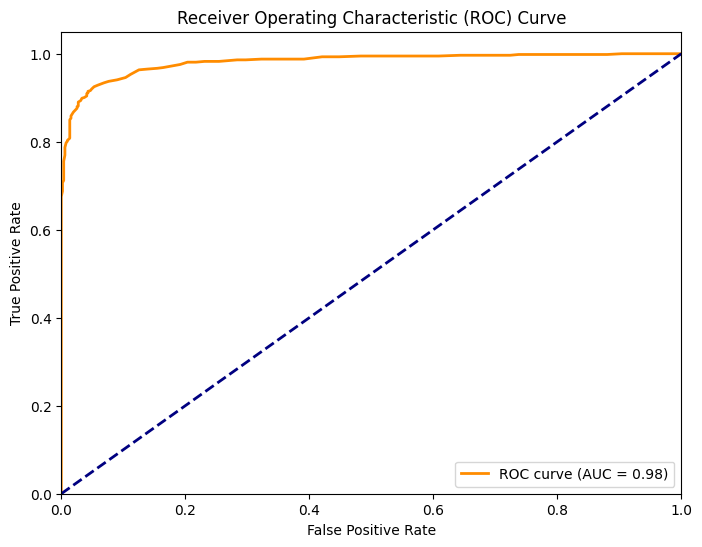

AUC-ROC: 0.9812


In [39]:

# Get the best model (based on accuracy)
best_model = model_results[best_model_accuracy]['Model']

# Train the best model
best_model.fit(X_train, y_train)

# Predict probabilities for the test set (needed for ROC Curve)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC-ROC score
print(f"AUC-ROC: {roc_auc:.4f}")


**Confusion Matrix**

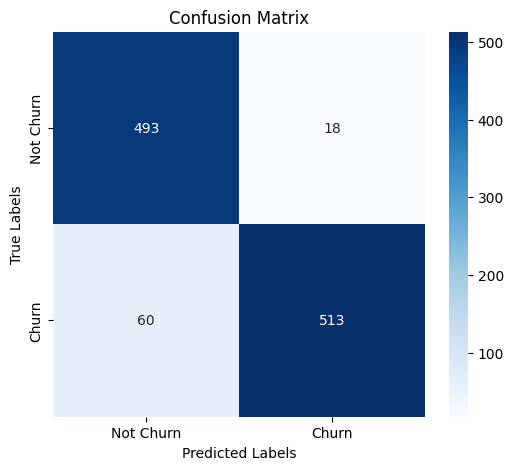

Confusion Matrix:
[[493  18]
 [ 60 513]]


In [40]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print confusion matrix
print(f"Confusion Matrix:\n{cm}")


For the customer churn prediction problem, prioritizing recall is essential because the primary goal is to identify as many potential churners as possible. Missing churn predictions (false negatives) could lead to lost customers and revenue. By maximizing recall, the company can proactively target at-risk customers with retention strategies, even if it means mistakenly including some loyal customers (false positives). This approach ensures that fewer churners slip through the cracks, helping to minimize customer attrition.


**How to Improve Recall**

**Adjust Decision Threshold:**

In [41]:
#y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get churn probabilities
#y_pred_adjusted = (y_pred_proba > 0.3).astype(int)  # Lower the threshold

**Rebalance the Dataset:**

In [42]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE()
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

To improve recall in customer churn prediction, several strategies can be employed, including adjusting the decision threshold, rebalancing the dataset through techniques like oversampling the minority class, and utilizing algorithms that are more sensitive to class imbalances such as Random Forest or Gradient Boosting. Additionally, feature engineering and ensemble methods can further enhance the model's ability to identify potential churners. By focusing on recall, businesses can ensure that as many at-risk customers as possible are flagged, allowing for targeted retention efforts and ultimately reducing customer churn.


**Conclusion**

In conclusion, the code successfully performs customer churn prediction by preprocessing the data (scaling, handling outliers), training multiple models, and evaluating their performance based on accuracy. After identifying the best model (Random Forest), model evaluation, confusion matrix, and ROC-AUC curve were used to assess its effectiveness. The model's ability to prioritize recall, ensuring most churners are predicted, allows for better customer retention strategies. This approach helps telecom companies take proactive steps to reduce churn and improve customer retention.









***Deployment Using Streamlit***

In [43]:
from pickle import dump
from pickle import load

In [44]:
#save the model to disc
file_name = 'final_model.sav'
dump(best_model,open(file_name,'wb'))

In [45]:
model = load(open(file_name,'rb'))

result = model.score(X_test,y_test)
print(result)

0.9298892988929889


In [46]:
df.columns

Index(['state', 'account.length', 'voice.plan', 'voice.messages', 'intl.plan',
       'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls',
       'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins',
       'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')